In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('Sales Data.csv')


# Display the first few rows and summary statistics
print(df.head(5))
print(df.info())
print(df.describe())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [4]:

# Handle missing values
df.isnull().sum()
#there is no missing values.


df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df.info())


df['pincode'] = ['145214'] * len(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data colu

C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


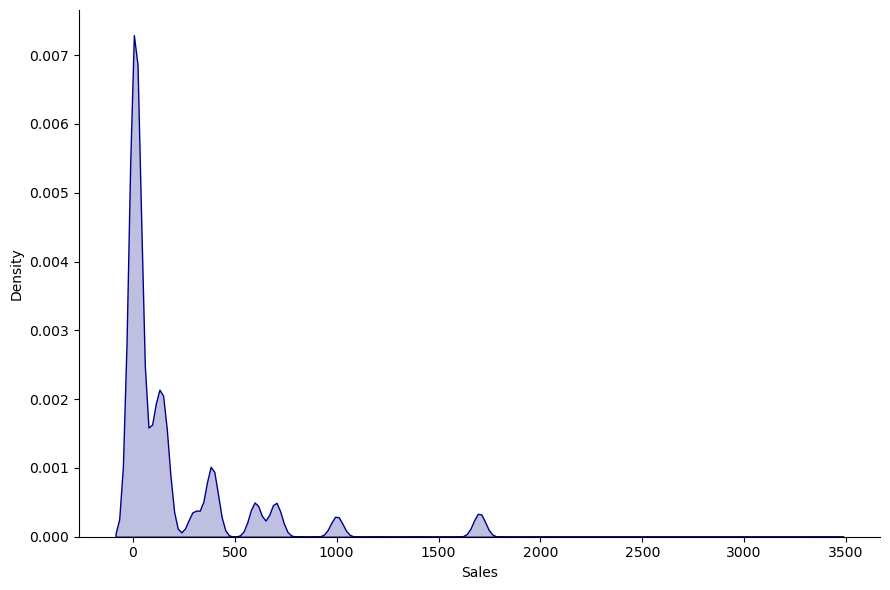

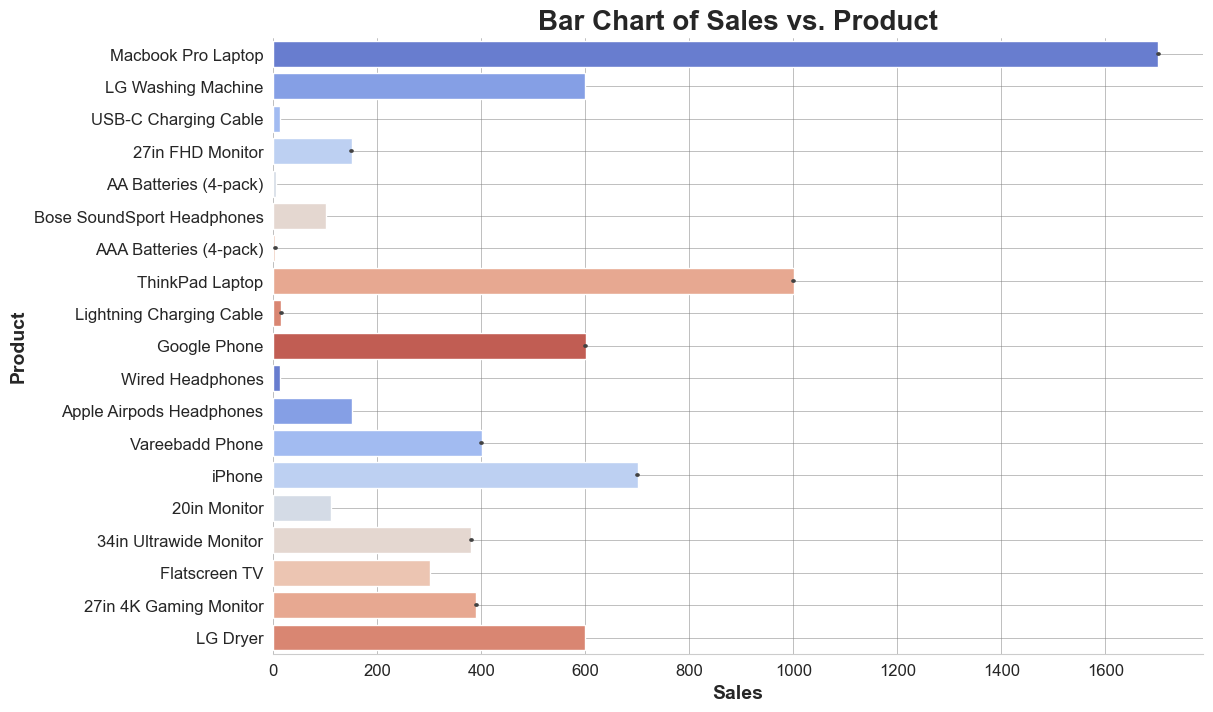

In [2]:

# Univariate analysis
plot = sns.displot(
    data=df, 
    x="Sales", 
    kind="kde", 
    height=6, 
    aspect=1.5, 
    color="darkblue", 
    fill=True
)
plt.show()



# Bivariate analysis
#Bar chart

sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", n_colors=10)  

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df, x="Sales", y="Product", palette=palette)
barplot.set_title("Bar Chart of Sales vs. Product", fontsize=20, weight='bold')
barplot.set_xlabel("Sales", fontsize=14, weight='bold')
barplot.set_ylabel("Product", fontsize=14, weight='bold')

barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_visible(False)
barplot.spines['bottom'].set_visible(True)
barplot.xaxis.set_ticks_position('none')
barplot.yaxis.set_ticks_position('none')
barplot.xaxis.set_tick_params(labelsize=12)
barplot.yaxis.set_tick_params(labelsize=12)
barplot.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)


plt.show()








In [129]:

# Summary statistics for key variables
summary_stats = df.describe(include='all')
print(summary_stats) 

# Grouped statistics

grouped_stats = df.groupby('City').agg({
    'Sales': ['mean', 'std', 'min', 'max'],
    'Quantity Ordered': ['mean', 'std', 'min', 'max']
})

print(grouped_stats)





           Unnamed: 0       Order ID               Product  Quantity Ordered  \
count   185950.000000  185950.000000                185950     185950.000000   
unique            NaN            NaN                    19               NaN   
top               NaN            NaN  USB-C Charging Cable               NaN   
freq              NaN            NaN                 21903               NaN   
mean      8340.388475  230417.569379                   NaN          1.124383   
min          0.000000  141234.000000                   NaN          1.000000   
25%       3894.000000  185831.250000                   NaN          1.000000   
50%       7786.000000  230367.500000                   NaN          1.000000   
75%      11872.000000  275035.750000                   NaN          1.000000   
max      25116.000000  319670.000000                   NaN          9.000000   
std       5450.554093   51512.737110                   NaN          0.442793   

           Price Each                  


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [7]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
import numpy as np
from scipy.stats import ttest_ind

# Sample sales data for two cities
city_a_sales = [1700, 600, 11.95, 3.84]
city_b_sales = [23.9, 99.99, 11.96]

# Perform independent t-test
t_statistic, p_value = ttest_ind(city_a_sales, city_b_sales)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant difference in sales between cities")
else:
    print("No significant difference in sales between cities")





# Example: Chi-square test for independence between Ship Mode and Customer Segment
import pandas as pd


df = pd.read_csv('Sales Data.csv')  # Replace with your file path

print(df.head())


print(df.columns)


contingency_table = pd.crosstab(df['Product'], df['City'])
print(contingency_table)

import scipy.stats as stats


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")








T-statistic: 1.129338140761255
P-value: 0.3100051211739053
No significant difference in sales between cities
   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlant

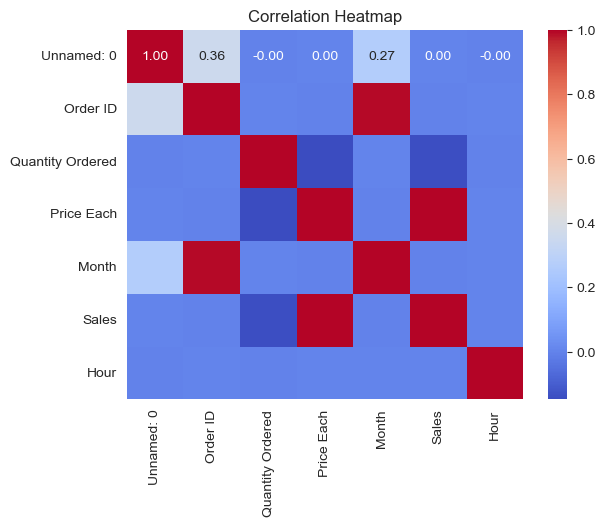

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Sales Data.csv')


numeric_data = data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_data.corr()


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()


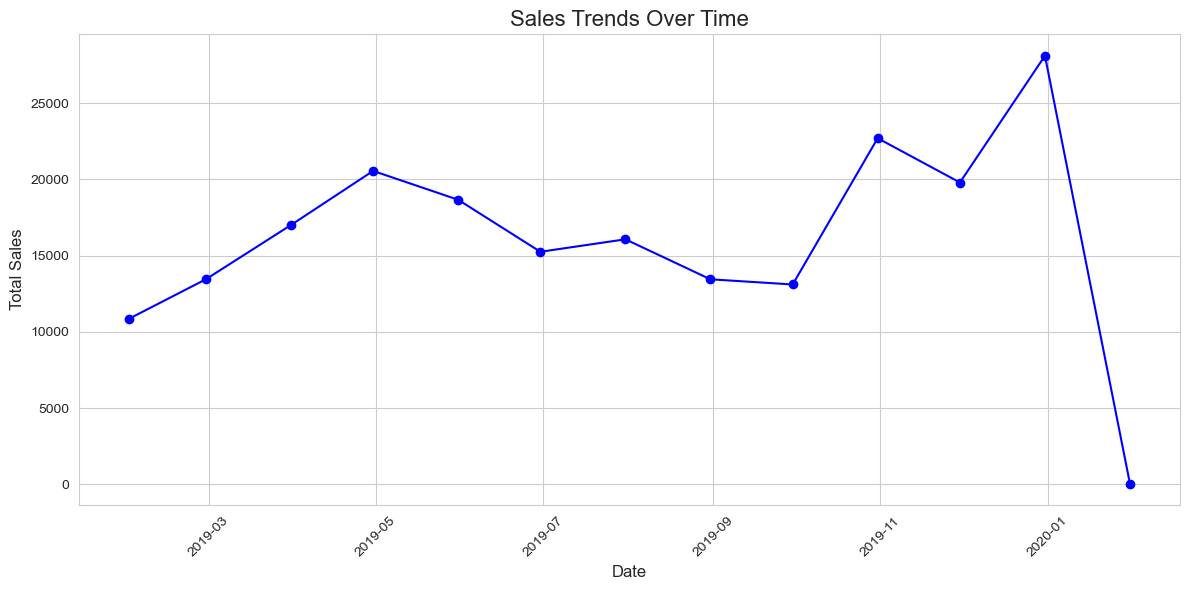

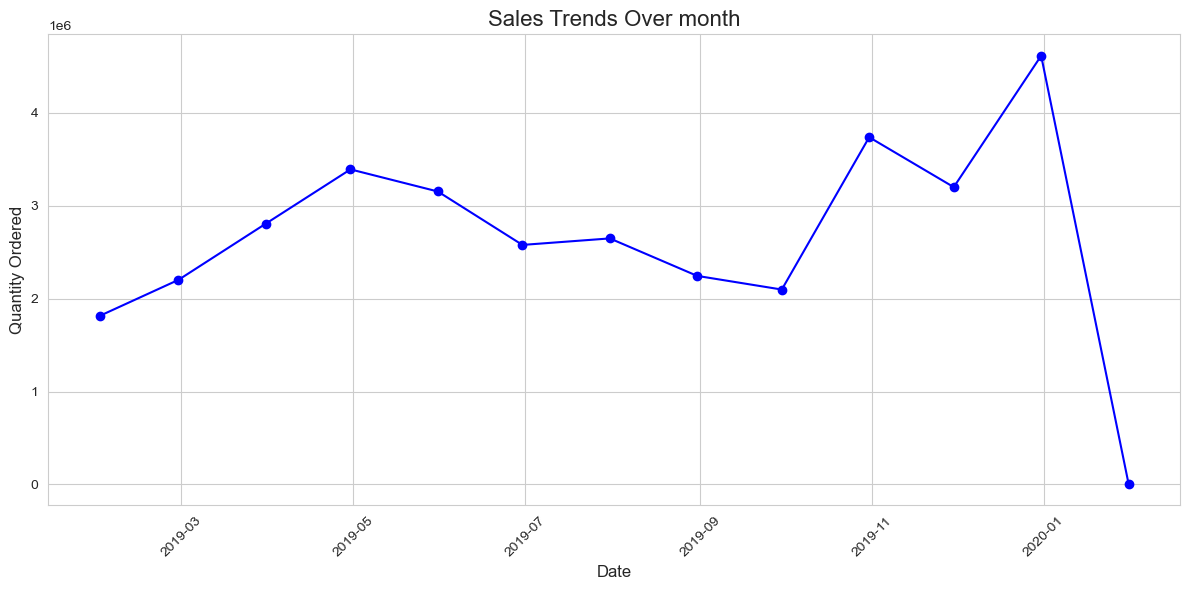

In [11]:
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Quantity Ordered'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resample sales data by month
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


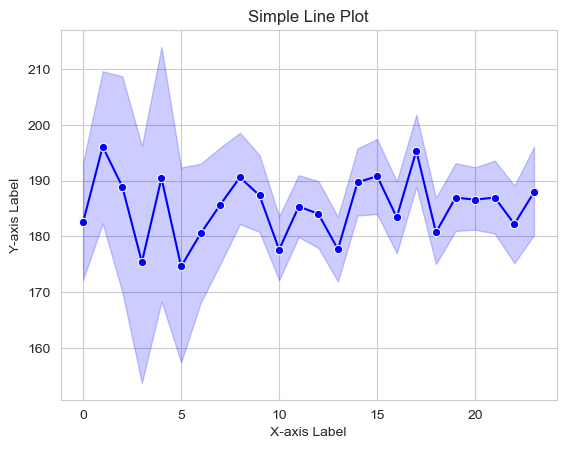

In [14]:

# Plotting profit trends over time
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')


# Create a line plot
sns.lineplot(x=data["Hour"], y=data["Sales"], data=data, marker='o', color='blue')


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.grid(True) 


plt.show()










   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

<Axes: xlabel='Sales', ylabel='Product'>

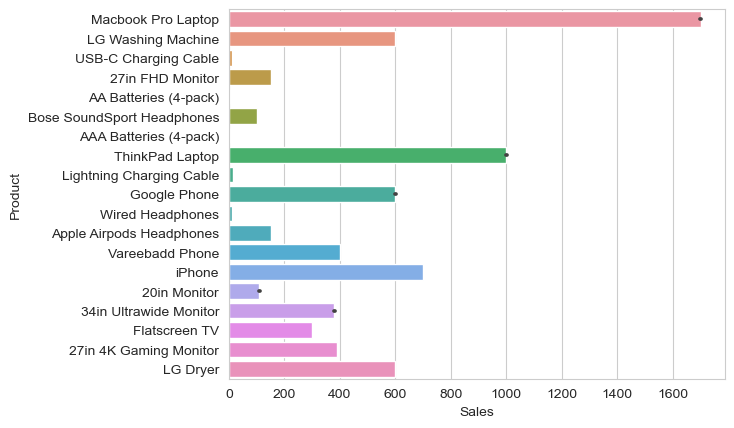

In [38]:

# Identifying top-performing product categories based on total sales and profit
import pandas as pd


data = pd.read_csv('Sales Data.csv') 


print(data.head())

print(data.columns)


product_performance = data.groupby('Product')[['Sales']].sum().reset_index()


product_performance_sorted = product_performance.sort_values(by='Sales', ascending=False)


print(product_performance_sorted.head())






# Plotting total sales by product category

sns.barplot(data, x="Sales", y="Product")




In [18]:

# Generating summary statistics for each region
summary_stats = data.groupby('City')['Sales'].agg(
    total_sales='sum',
    average_sales='mean',
    transaction_count='count'
).reset_index()


print(summary_stats)




             City  total_sales  average_sales  transaction_count
0         Atlanta   2795498.58     187.856903              14881
1          Austin   1819581.75     183.703357               9905
2          Boston   3661642.01     183.688272              19934
3          Dallas   2767975.40     186.772969              14820
4     Los Angeles   5452570.80     184.177362              29605
5   New York City   4664317.43     187.502711              24876
6        Portland   2320490.61     186.160498              12465
7   San Francisco   8262203.91     184.704550              44732
8         Seattle   2747755.48     186.516120              14732


C:\Users\tusha\AppData\Local\Temp\ipykernel_23356\3154096649.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')


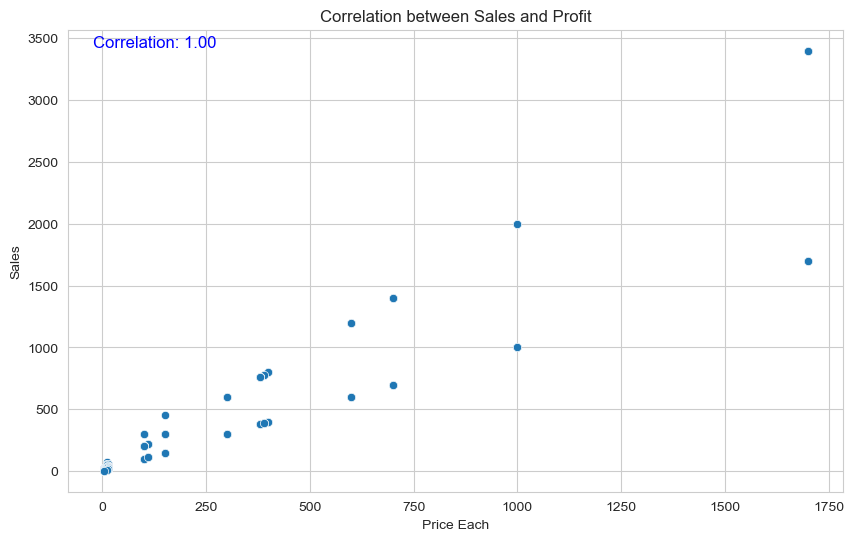

In [20]:

# Visualizing the correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')


plt.title('Correlation between Sales and Profit')
plt.xlabel('Price Each')
plt.ylabel('Sales')


correlation = data['Price Each'].corr(data['Sales'])
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')


plt.show()



C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


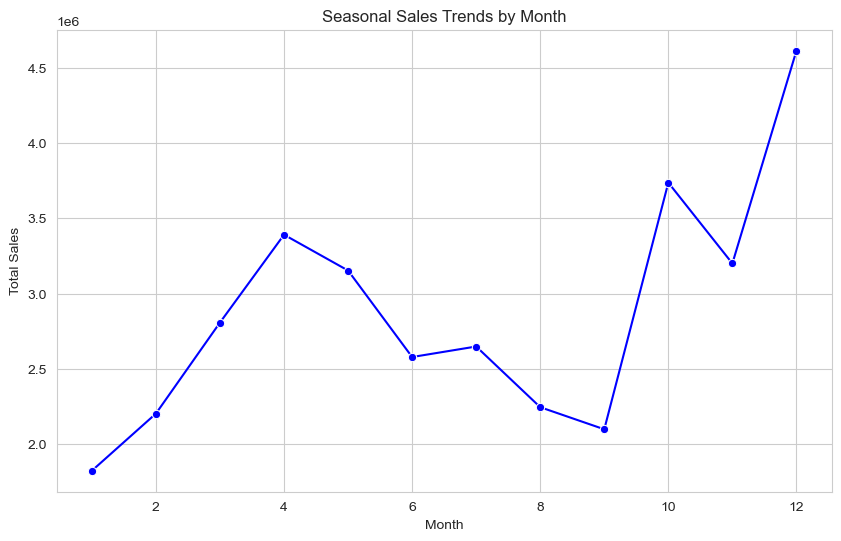

C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


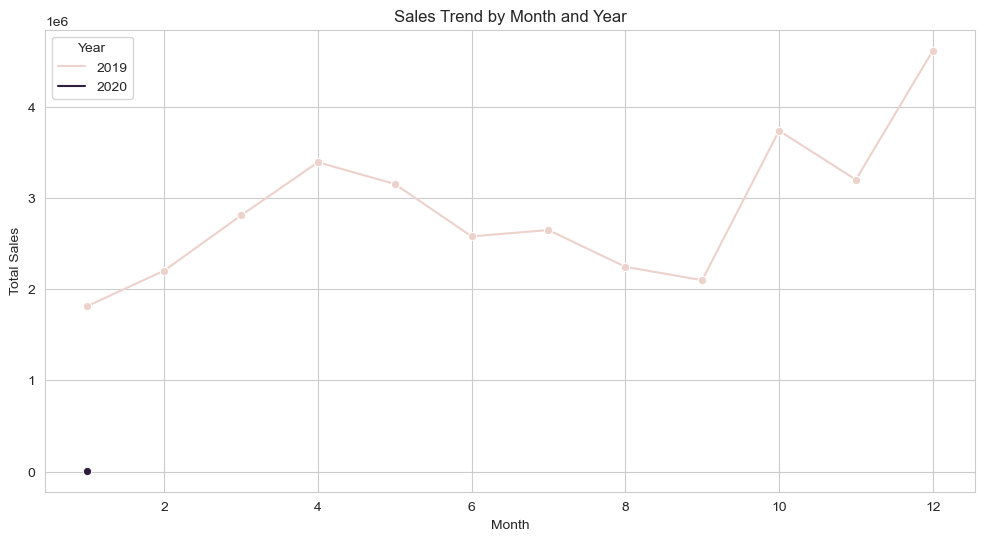

C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tusha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


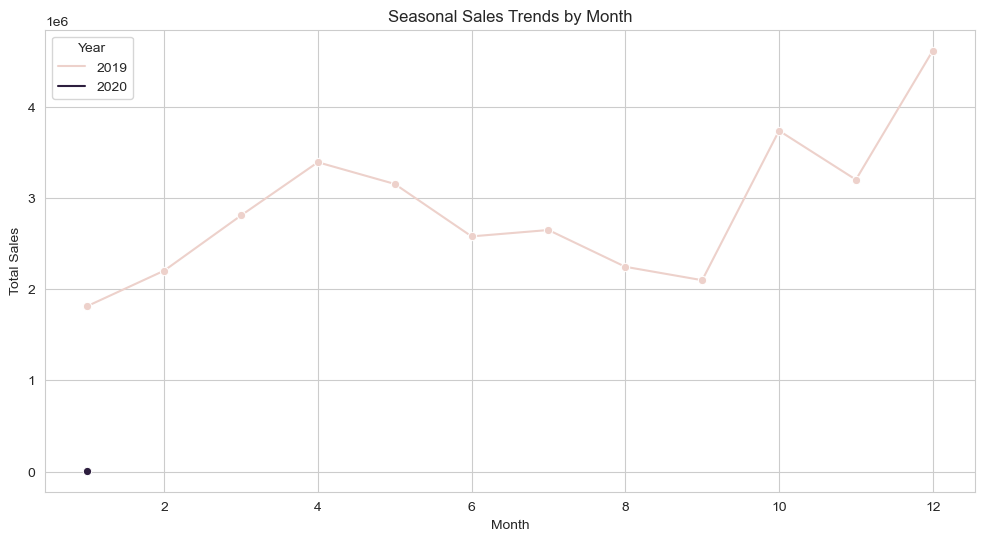

In [22]:

# Analyzing seasonal sales trends
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Plotting seasonal sales trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='b')

plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')


plt.show()



# Grouping sales data by month and year
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping data by Year and Month, summing Sales
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting total sales by Month and Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_yearly_sales, marker='o')

plt.title('Sales Trend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')


plt.show()



df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y %H:%M')


df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping data by Year and Month, summing Sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker='o')


plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.show()








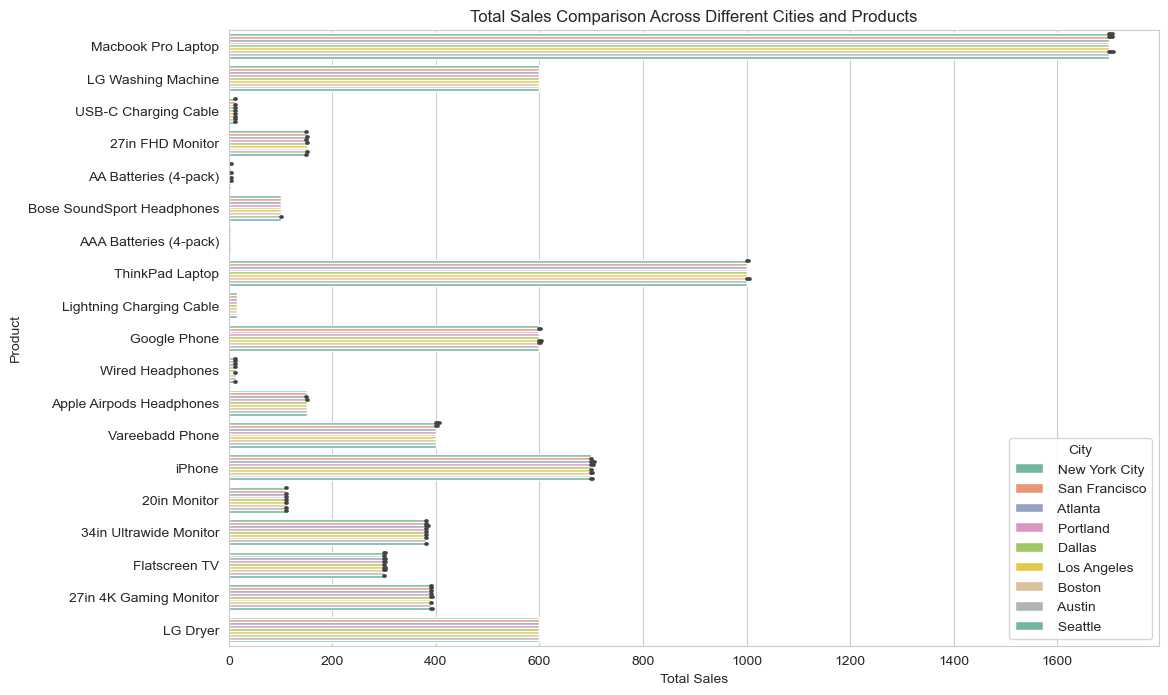

In [158]:

# Comparing sales across different ship modes
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product', hue='City', data=data, palette='Set2')


plt.title('Total Sales Comparison Across Different Cities and Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')


plt.show()






In [24]:
# Ensure column names are clean
df.columns = df.columns.str.strip()  
df.columns = df.columns.str.replace(' ', '_')  
df.columns = df.columns.str.lower()  
print(df.head())

# Print column names to verify
print(df.columns)


# Ensure 'Ship Date' column is datetime type
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

print(df['order_date'].dtype)


# Dropping rows where 'Ship Date' couldn't be converted
df = df.dropna(subset=['order_date'])
print(df.isnull().sum())


# Resample sales data by month
df.set_index('order_date', inplace=True)

monthly_sales = df['sales'].resample('M').sum()


print(monthly_sales)




   unnamed:_0  order_id               product  quantity_ordered  price_each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           order_date                        purchase_address  month    sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             city  hour pincode  year 